In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import the dataset and understand it.

In [27]:
df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


# 2. List down the number of rows and columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

# 3. ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

In [29]:
df["int_rate"] = df["int_rate"].apply(lambda x: x.astype(float, errors='ignore'))


AttributeError: 'str' object has no attribute 'astype'

In [30]:
df["int_rate"] = df["int_rate"].astype(float)

ValueError: could not convert string to float: '10.65%'

# 4. Check the datatype of each column.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

# 5. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

In [32]:
df1=df.drop(columns=["Unnamed: 21","Unnamed: 22"],axis=1)
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


In [33]:
#Inplace
df.drop(columns=["Unnamed: 21","Unnamed: 22"],axis=1,inplace=True)

In [34]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


# 6. Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.


In [35]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [36]:
df["loan_status"][(df["loan_status"]=="Fully Paid")|(df["loan_status"]=="Charged Off")]

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

# 7. Filter the ‘Emp_Len’ column to extract the numerical value from the string.
## Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [37]:
df['Emp_Len_num'] = df["emp_length"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [38]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Emp_Len_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,10.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,1.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,10.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,10.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,1.0


# 8. Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [41]:
#df["term_num1"]= df["term"].apply(term = lambda x: x['term'].str.extract('(\d+)'))

TypeError: apply() missing 1 required positional argument: 'func'

In [ ]:
df['term_num'] = df['term'].str.replace('\D+', '')

In [42]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Emp_Len_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,10.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,1.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,10.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,10.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,1.0


# 9. Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria - If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.


In [26]:
for i in len(df.loan_amnt):
    if i<=df.funded_amnt:
        print("0")
    else:
        print("1")
        

TypeError: 'int' object is not iterable

# 10. Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.


C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


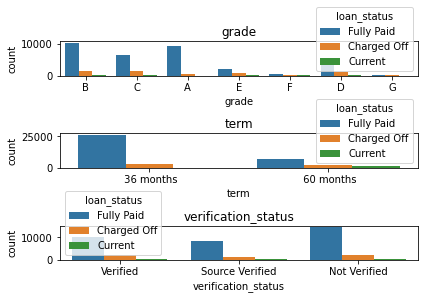

In [52]:
cols=["grade","term","verification_status"]
rows=3
columns=1
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i],hue=df.loan_status)    
    plt.title(i)
    iterator=iterator+1
    #plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [50]:
pd.crosstab(df.grade,df.loan_status)

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,602,40,9443
B,1425,345,10250
C,1347,264,6487
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

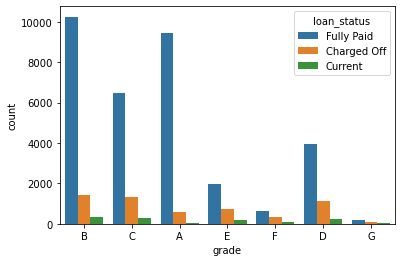

In [51]:
sns.countplot(df.grade,hue=df.loan_status)